In [1]:
# If you have not installed the libraries, install them here:
#pip install numpy
#pip install pandas
#pip install matplotlib
#pip install scipy
#pip install scikit-learn

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Load the dataset
df = pd.read_csv('student_scores.csv')
print("Dataset:\n", df.head())

# Define features and target variable
X = df[['Age']]
y = df['Score']



Dataset:
       Name  Age  Score
0    Alice   24     85
1      Bob   27     90
2  Charlie   22     78
3    David   32     88
4      Eva   29     92


In [2]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)



Mean Squared Error: 50.39883866074271
R^2 Score: 0.49601161339257294


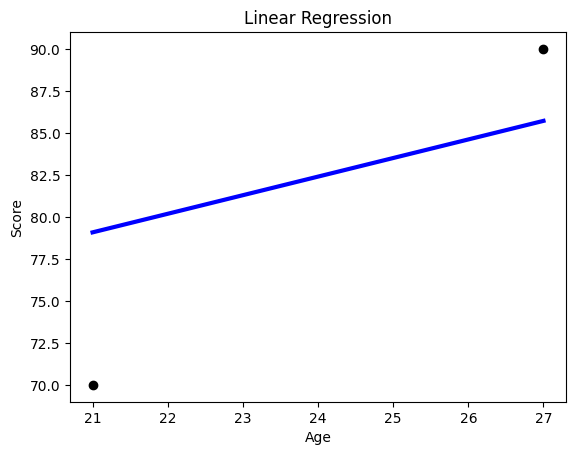

In [3]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Plot the results
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Linear Regression')
plt.xlabel('Age')
plt.ylabel('Score')
plt.show()



In [4]:
# Lasso Regression
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("Lasso Regression R^2 Score:", r2_score(y_test, y_pred_lasso))



Lasso Regression R^2 Score: 0.44361793344903266


In [5]:
# Decision Tree Regressor
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print("Decision Tree Regressor R^2 Score:", r2_score(y_test, y_pred_tree))



Decision Tree Regressor R^2 Score: 0.18000000000000005


In [7]:
# Random Forest Regressor
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)
print("Random Forest Regressor R^2 Score:", r2_score(y_test, y_pred_forest))




Random Forest Regressor R^2 Score: 0.3891735000000004


In [8]:
# Gradient Boosting Regressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
print("Gradient Boosting Regressor R^2 Score:", r2_score(y_test, y_pred_gbr))



Gradient Boosting Regressor R^2 Score: 0.18102165860897057


In [9]:
# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

# Display the best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
